In [3]:
%cd ..

c:\Users\M\Documents\LifeLongLearning\ai_projects\detectron2


In [4]:
# Base setup:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Common libraries:
import numpy as np # this one has to downgraded to below version 2.0.0
# import numpy
import os, json, cv2, random
import matplotlib.pyplot as plt
%matplotlib inline

# detectron2 utilities:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode
# import numpy


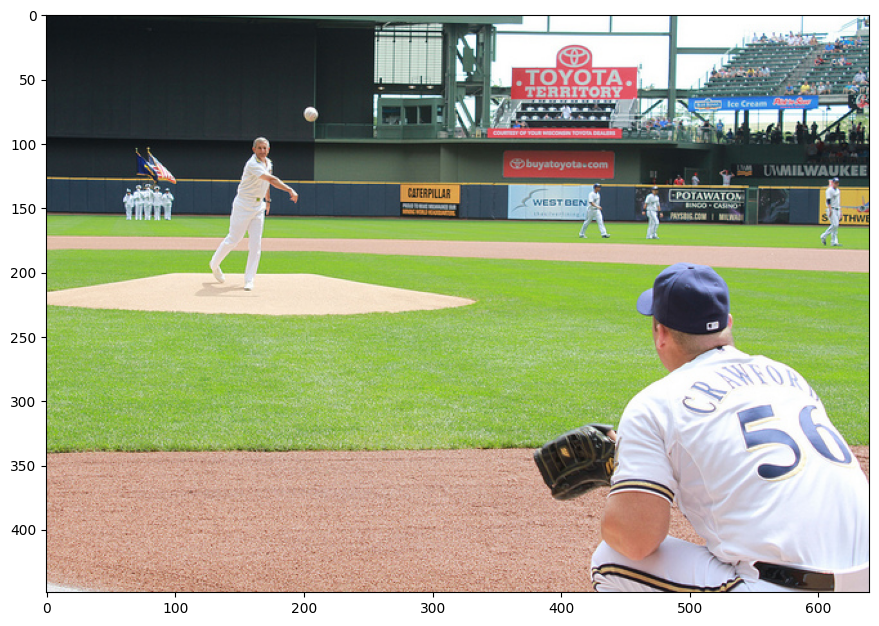

In [5]:
!wget http://images.cocodataset.org/val2017/000000282037.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")

plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1]) #bgr to rgb

In [10]:
model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

c:\Users\M\Documents\LifeLongLearning\ai_projects\detectron2\detectron2\model_zoo\configs\COCO-Detection\faster_rcnn_R_50_FPN_3x.yaml


RuntimeError: COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml not available in Model Zoo!

In [11]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# predictor = DefaultPredictor(cfg)
# outputs = predictor(im[..., ::-1])

RuntimeError: COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml not available in Model Zoo!

In [7]:
model_zoo.get_config_file

<function detectron2.model_zoo.model_zoo.get_config_file(config_path)>

In [8]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0,  0,  0, 32, 35])
Boxes(tensor([[427.5591, 195.8290, 634.5423, 444.0052],
        [126.6540,  96.6057, 197.1650, 214.5264],
        [413.5167, 130.2429, 438.1813, 174.7275],
        [463.5481, 135.3226, 478.4955, 175.1248],
        [601.0505, 125.8764, 618.3305, 177.2960],
        [200.1745,  71.5553, 211.7309,  84.0478],
        [378.7341, 317.6579, 442.5959, 380.3308]]))


In [7]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

sfdsf

namespace(name='coco_2017_train',
          json_file='datasets\\coco/annotations/instances_train2017.json',
          image_root='datasets\\coco/train2017',
          evaluator_type='coco',
          thing_dataset_id_to_contiguous_id={1: 0,
                                             2: 1,
                                             3: 2,
                                             4: 3,
                                             5: 4,
                                             6: 5,
                                             7: 6,
                                             8: 7,
                                             9: 8,
                                             10: 9,
                                             11: 10,
                                             13: 11,
                                             14: 12,
                                             15: 13,
                                             16: 14,
                                 